<h1 align='center'>Distribution of LDA topics</h1>

In this notebook we have a closer look at the topics we computed with the LDA algorithm and analyze their popularity across different countries and over time
<hr>

In [1]:
from gensim import corpora, models, similarities, matutils
import itertools
import numpy as np
import pandas as pd
from unidecode import unidecode
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
dropbox = "/Users/mr/Dropbox/moviemeta/"

## LDA topic distribution for IMDB data

In [3]:
imdb_lda = models.LdaModel.load(dropbox +'lda_imdb.model')
imdb_corpus = corpora.MmCorpus(dropbox +'lda_imdb.corpus')
imdb_dict = corpora.Dictionary.load(dropbox +'lda_imdb.dict')
imdb_meta_df = pd.read_csv(dropbox + 'imdb_meta_df.csv')

#imdb_topic_matrix = matutils.corpus2dense(imdb_lda[imdb_corpus], num_terms=30, num_docs=len(imdb_corpus))
#imdb_topic_df = pd.DataFrame(np.ndarray.transpose(imdb_topic_matrix))
#imdb_topic_df = pd.concat([imdb_topic_df, imdb_meta_df], axis=1) 


Now we have created a dataframe with the topic distribution for every movie. We have 30 topics, columns 0 - 29. The values represent how prominently a topic features in a movie.

In [349]:
imdb_topic_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,Unnamed: 0,title,year
0,0,0,0,0,0.000000,0.097918,0,0.000000,0,0,...,0.000000,0.658444,0.000000,0.000000,0.000000,0,0,0,#1 Cheerleader Camp (2010) (V),2010
1,0,0,0,0,0.037337,0.000000,0,0.800624,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,#1 Serial Killer (2013),2013
2,0,0,0,0,0.000000,0.000000,0,0.000000,0,0,...,0.000000,0.229762,0.000000,0.000000,0.069428,0,0,2,#1 at the Apocalypse Box Office (2015),2015
3,0,0,0,0,0.000000,0.291754,0,0.290477,0,0,...,0.000000,0.000000,0.035630,0.030289,0.000000,0,0,3,#137 (2011),2011
4,0,0,0,0,0.000000,0.000000,0,0.516715,0,0,...,0.223937,0.000000,0.107099,0.000000,0.000000,0,0,4,#29 (2012),2012


### Filtering metadata by popular movies

In [98]:
topmovies_df=pd.read_csv(dropbox + "TopMovies_final.csv")

In [527]:
def get(df, year=None, country=None):
    """get a dataframe filtered by year and/or country"""
    if year:
        df = df[df['year']==year]
        if country:
            return df[df['country']==country]
    elif country:
        return df[df['country']==country]
    return df

In [335]:
imdb_meta_top_df = pd.DataFrame()

for year in range(2001, 2015):
    meta = get(imdb_meta_df, year)
    top = get(topmovies_df, year)
    #remove date from imdb title
    titles = meta.title.apply(lambda x : x.split('(')[0].strip().lower())
    meta = meta[titles.isin([t.lower() for t in top.movie.tolist()])]
    imdb_meta_top_df = pd.concat([imdb_meta_top_df, meta])

### Adding country of origin from IMDB data

In [ ]:
imdb_meta_2007_2015 = imdb_meta_df[imdb_meta_df.year > 2006]

with open(dropbox + "imdb/countries.list") as f:
    countries = f.readlines()
    
imdb_meta_2007_2015['origin'] = pd.Series(index=imdb_meta_2007_2015.index)
for i,movie in enumerate(countries):
    if movie[0] == '"':
        continue
    if i%10000 == 0:
        print i
    split = movie.split('\t')
    title = split[0]
    idx = imdb_meta_2007_2015[imdb_meta_2007_2015['title']== title].index
    #if the title is in our dataframe add the country
    if len(idx > 0):
        imdb_meta_2007_2015.loc[[idx[0]],['origin']]= split[len(split)-1].replace('\n','')
imdb_meta_2007_2015.to_csv(dropbox + 'imdb_meta_2007_2015.csv')

/Users/mr/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mr/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390000
1400000
1410000
1420000
1430000
1440000
1450000
1460000
1470000
1480000
1490000

In [359]:
imdb_meta_2007_2015 = pd.read_csv(dropbox + 'imdb_meta_top_df.csv')
imdb_meta_2007_2015 = imdb_meta_2007_2015.set_index('Unnamed: 0')

imdb_topic_df = pd.concat([imdb_topic_df, imdb_meta_2007_2015[['origin']]], axis=1) 

### Filter the topic matrix by popular movies

In [361]:
imdb_topic_top_df = pd.DataFrame()

for year in range(2001, 2015):
    for country in ['Germany','United States', 'United Kingdom', 'South Korea', 'Japan', 'Hong Kong']:
        topic = get(imdb_topic_df, year)
        top = get(topmovies_df, year,country)
        #remove date from imdb title, compare lower cased titles
        titles = topic.title.apply(lambda x : x.split('(')[0].strip().lower())
        topic = topic[titles.isin([t.lower() for t in top.movie.tolist()])]
        topic['country'] = country
        imdb_topic_top_df = pd.concat([imdb_topic_top_df, topic])
imdb_topic_top_df.head()    

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,Unnamed: 0,title,year,country
5579,0.000000,0,0.000000,0.250567,0.000000,0.000000,0.040590,0.000000,0.000000,0.057859,...,0.000000,0.081989,0.084390,0.074641,0.000000,0.038926,5579,A Knight's Tale (2001),2001,Germany
13945,0.000000,0,0.029535,0.000000,0.000000,0.151524,0.000000,0.070632,0.000000,0.000000,...,0.149189,0.000000,0.000000,0.000000,0.046435,0.000000,13945,Along Came a Spider (2001),2001,Germany
14601,0.000000,0,0.027998,0.000000,0.090975,0.000000,0.130352,0.000000,0.027804,0.000000,...,0.070540,0.000000,0.015746,0.061757,0.000000,0.173734,14601,America's Sweethearts (2001),2001,Germany
14900,0.000000,0,0.000000,0.000000,0.000000,0.106955,0.000000,0.663150,0.000000,0.000000,...,0.000000,0.062997,0.038708,0.000000,0.000000,0.097326,14900,American Pie 2 (2001),2001,Germany
16626,0.029772,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.030694,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.387214,0.000000,16626,Angel Eyes (2001),2001,Germany


In [363]:
for year in range(2001, 2015):
    for country in ['Germany','United States', 'United Kingdom', 'South Korea', 'Japan', 'Hong Kong']:
        print country
        print year
        print get(imdb_topic_top_df, year, country).shape[0]
        print '================================'

Germany
2001
78
United States
2001
184
United Kingdom
2001
0
South Korea
2001
0
Japan
2001
0
Hong Kong
2001
0
Germany
2002
85
United States
2002
220
United Kingdom
2002
98
South Korea
2002
0
Japan
2002
41
Hong Kong
2002
49
Germany
2003
90
United States
2003
197
United Kingdom
2003
105
South Korea
2003
0
Japan
2003
36
Hong Kong
2003
43
Germany
2004
113
United States
2004
233
United Kingdom
2004
153
South Korea
2004
0
Japan
2004
38
Hong Kong
2004
38
Germany
2005
94
United States
2005
217
United Kingdom
2005
137
South Korea
2005
0
Japan
2005
38
Hong Kong
2005
42
Germany
2006
113
United States
2006
231
United Kingdom
2006
177
South Korea
2006
0
Japan
2006
33
Hong Kong
2006
41
Germany
2007
125
United States
2007
229
United Kingdom
2007
194
South Korea
2007
74
Japan
2007
29
Hong Kong
2007
46
Germany
2008
107
United States
2008
224
United Kingdom
2008
193
South Korea
2008
68
Japan
2008
31
Hong Kong
2008
43
Germany
2009
105
United States
2009
208
United Kingdom
2009
146
South Korea
2009
64
Jap

In [493]:
imdb_topic_labels ={0:'magic, myths',
                    1:'school, college',
                    2:'fantasy, christmas',
                    3:'home', 
                    4:'ships, sailing, pirates',
                    5:'love, relationships',
                    6:'war', 
                    7:'exploration, nature, space', 
                    8:'comedy',
                    9:'places, nature, scenery',
                    10:'hollywood, stars', 
                    11:'society, culture',
                    12:'historical, costumes', 
                    13:'money, robbery',
                    14:'photography, design',
                    15:'spies, terrorism', 
                    16:'mixed', 
                    17:'town',
                    18:'press, politics',
                    19:'crime, police, underworld',
                    20:'documentary, interview',
                    21:'friendship, relationships',
                    22:'cowboys and indians',
                    23:'night life, enjoyment',
                    24:'crime, mistery', 
                    25:'music',
                    26:'farming, country side',
                    27:'fantasy, fairy tale',
                    28:'love, family', 
                    29:'gangs, drugs, police'}

In [536]:
def toptopics(df, num=5):
    """get the globally most relevant topics from a topic matrix"""
    topics = range(0,30)
    topic_sums = []
    for topic in topics:
        topic_sum = df[topic].sum()
        topic_sums.append((topic, topic_sum))

    topic_sums = sorted(topic_sums, key=lambda x: x[1], reverse=True)
    return [tup[0] for tup in topic_sums][:num]
imdb_top_topics = toptopics(imdb_topic_df)

Let's have a look, what the globally most relevant topic are:

In [494]:
[imdb_topic_labels[t] for t in imdb_top]

['love, relationships',
 'love, family',
 'friendship, relationships',
 'exploration, nature, space',
 'crime, mistery',
 'society, culture',
 'documentary, interview',
 'gangs, drugs, police',
 'money, robbery',
 'music']

We see that the topics revolving around love and relationships are prevalent. Who would have thought?

## Topic popularity across time and countries

First we define 2 functions to get the mean topic scores by country and year and by year only:

In [582]:
import math
def get_topic_scores_year(df, topics, years):
    """get the topic scores from a topic matrix by year and topic"""
    topic_scores = dict.fromkeys(topics) 
    for topic in topics:
        scores = []
        for year in years:
            topic_mean = get(df, year)[topic].mean()
            if not math.isnan(topic_mean):
                scores.append(topic_mean)
            else: scores.append(0)
            topic_scores[topic] = scores
    return topic_scores

In [553]:
def get_topic_scores(df, topics):
    """get the topic scores from a topic matrix by topic"""
    scores = []
    for topic in topics:
        topic_mean = get(df, year)[topic].mean()
        scores.append(topic_mean)
    return topics,scores


We now collect all topic scores from IMDB by year.

In [523]:
years = range(2000,2015)
imdb_topic_scores = get_topic_scores_year(imdb_topic_df, imdb_top_topics, years)
#set topic labels instead of keys
for key in imdb_topic_scores.keys():
    imdb_topic_scores[imdb_topic_labels[key]] = imdb_topic_scores.pop(key)

We filter the popular topics for 3 countries and store in new frames.

In [587]:
pop_usa = get(imdb_topic_top_df, country='United States')
pop_ge = get(imdb_topic_top_df, country='Germany')
pop_sk = get(imdb_topic_top_df, country='South Korea')

### Topic popularity by countries

Now we can have a look at the differences between the popularity of topics between the countries.

[0, 1, 2, 3, 4, 5]


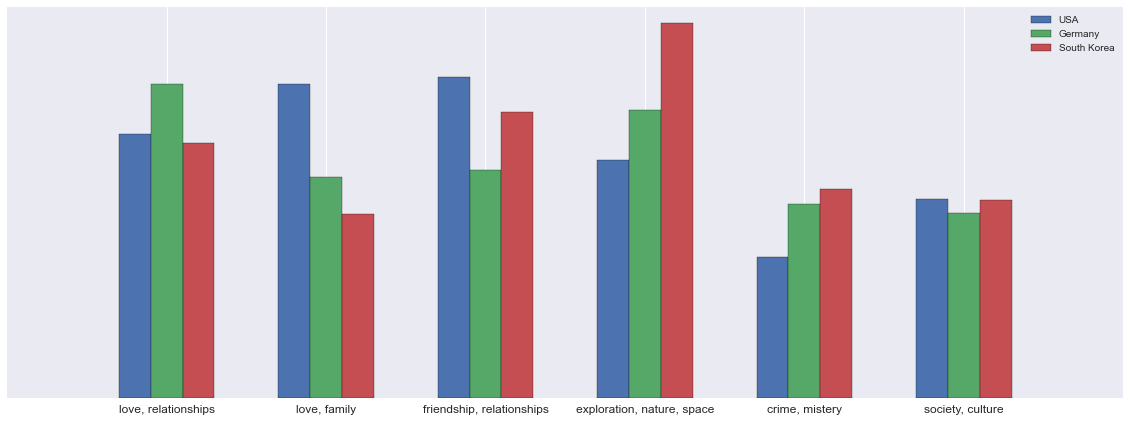

In [589]:
# some help from here: http://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
top_topics = toptopics(imdb_topic_df, num=6)
topics, usscores  = get_topic_scores(pop_usa, top_topics)
_, gescores  = get_topic_scores(pop_ge, top_topics)
_, skscores  = get_topic_scores(pop_sk, top_topics)
_, ukscores  = get_topic_scores(pop_uk, top_topics)

plt.figure(figsize=(20,7))
palette = sns.color_palette()
x = range(len(topics))
plt.bar([e-0.2 for e in x], usscores, width=0.2,color = palette[0], align='center', label='USA' )
plt.bar(x, gescores, width=0.2, color = palette[1], align='center', label='Germany')
plt.bar([e+0.2 for e in x], skscores,width=0.2,color = palette[2], align='center' , label='South Korea')
labels = [imdb_topic_labels[key] for key in topics]
plt.xticks(x, labels,fontsize=12)
plt.yticks([])
plt.legend()
plt.show()

We see that the popularity of different topics is quite similar across the countries. But we can make out some differences especially when comparing the USA with South Korea. For example, while the 'love,family' topic is prevalent in the USA (along with 'friendship, relationship', the 'exploration, nature, space' topic is much more popular in South Korea. 

### Topic popularity over time

Now let's have a look at the development of topics over time. We have collected boxoffice data for USA and Germany since 2001 and for South Korea since 2007.

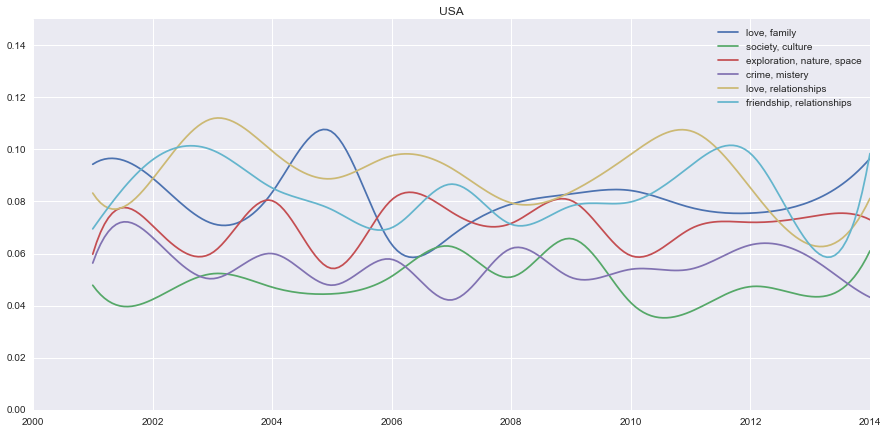

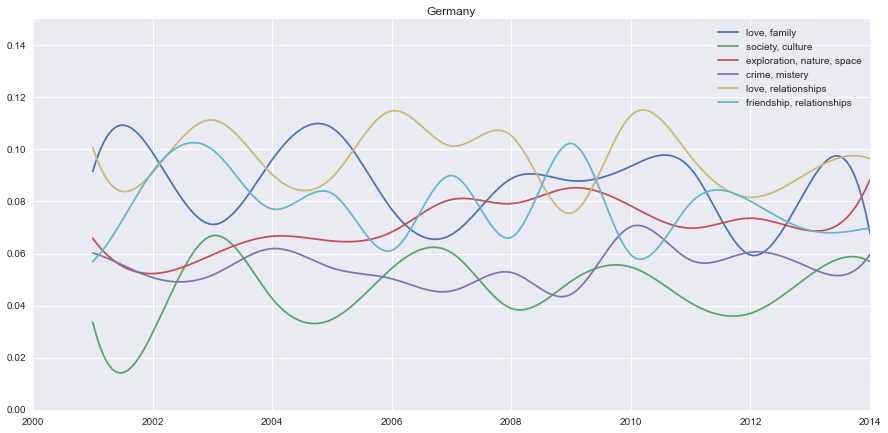

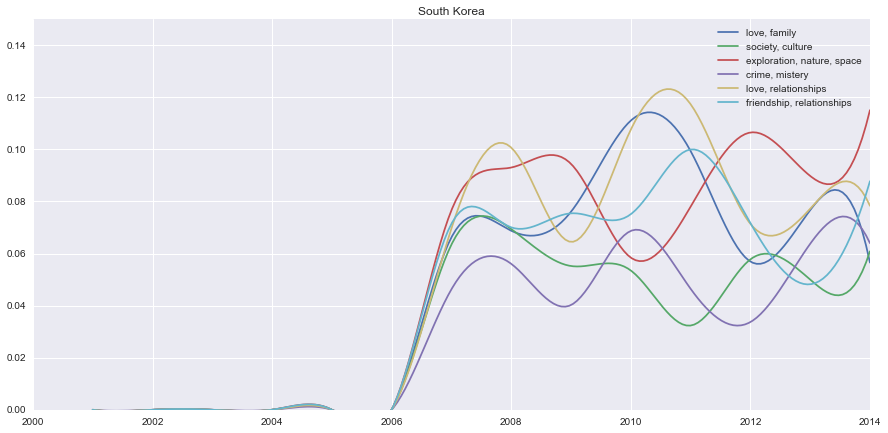

In [660]:
from scipy.interpolate  import spline
def key2label(d):
    for key in d.keys():
        d[imdb_topic_labels[key]] = d.pop(key)
        
years = range(2001,2015)
pop_usa_scores_year = get_topic_scores_year(pop_usa, top_topics, years)
key2label(pop_usa_scores_year)
pop_sk_scores_year = get_topic_scores_year(pop_sk, top_topics, years)
key2label(pop_sk_scores_year)
pop_ge_scores_year = get_topic_scores_year(pop_ge, top_topics, years)
key2label(pop_ge_scores_year)

def timeseries(score_dict, title):
    plt.figure(figsize=(15,7))
    for topic in score_dict.keys():
        x = years
        y = score_dict[topic]
        x_smooth = np.linspace(min(x), max(x), 200)
        y_smooth = spline(x, y, x_smooth)
        plt.plot(x_smooth, y_smooth, label=topic)
    plt.title(title)
    plt.ylim((0,0.15))
    plt.legend()  
    plt.show
timeseries(pop_usa_scores_year, 'USA')
timeseries(pop_ge_scores_year, 'Germany')
timeseries(pop_sk_scores_year, 'South Korea')


We can't really make out any trends in the time series. Topics tend to move up and down from year to year, but generally stay in the same zone. 

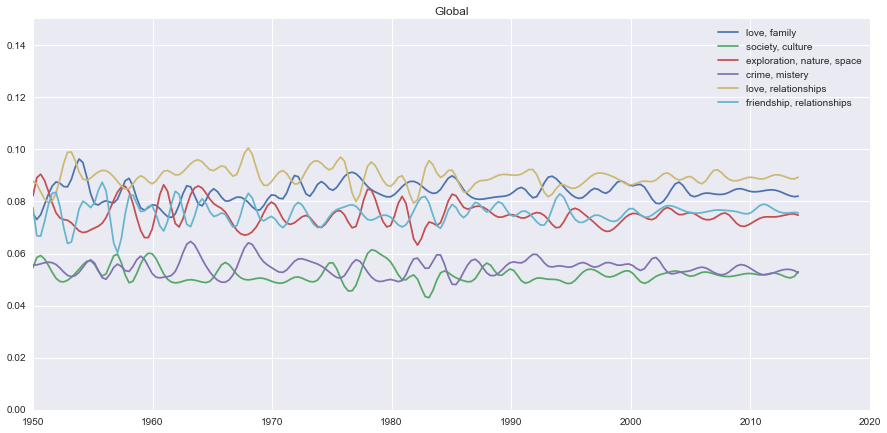

In [661]:
years = range(1950,2015)
topic_scores_year = get_topic_scores_year(imdb_topic_df, top_topics, years)
key2label(topic_scores_year)
timeseries(topic_scores_year,'Global')
#plt.figure(figsize=(20,7))
#from scipy.interpolate  import spline
#for topic in topic_scores_year.keys():
#    x = years
#    y = topic_scores_year[topic]
#    x_smooth = np.linspace(min(x), max(x), 100)
#    y_smooth = spline(x, y, x_smooth)
#    plt.plot(x_smooth,y_smooth, label=topic)
#plt.legend()    

Looking at the global development since 1950 we see a similar plot. There is one observation we can make though: Until about 1985 there is a lot of movement in the topics, after that the lines become much more even. But this could be due to the fact that we there is much less data for the earlier years.